# Gradient Boost com XGBoost

```python
# Importando bibliotecas essenciais e dados

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [31]:
dataset_train = pd.read_csv("data/train_processed.csv")
dataset_test = pd.read_csv("data/test_processed.csv")

In [32]:
dataset_train.head(5)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Jovem,Adulto,Idoso,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,...,0.56250,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,...,0.18750,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,...,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,...,0.28125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,...,0.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
dataset_test.head(5)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Jovem,Adulto,Idoso,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.026050,1.0,0.8,0.6,0.8,0.6,0.8,0.6,1.0,1.0,...,1.3750,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.571890,0.2,0.2,0.6,0.2,1.0,0.8,1.0,0.8,0.8,...,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.032512,0.4,0.0,0.4,0.8,0.4,0.4,0.4,0.4,0.8,...,0.0000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.675687,0.0,0.0,0.0,0.4,0.6,0.8,0.8,0.2,0.2,...,0.1875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.232431,0.4,0.6,0.8,0.6,0.8,0.2,0.4,0.4,0.4,...,0.6250,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [34]:
from sklearn.model_selection import train_test_split

X_train = dataset_train.drop("satisfaction_satisfied",axis=1)
y_train = dataset_train["satisfaction_satisfied"]

X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_test = dataset_test.drop("satisfaction_satisfied",axis=1)
y_test = dataset_test["satisfaction_satisfied"]

```python
# Aqui abaixo printamos o tamanho de cada conjunto de dados
from import matplotlib.pyplot as plt
import seaborn as sns

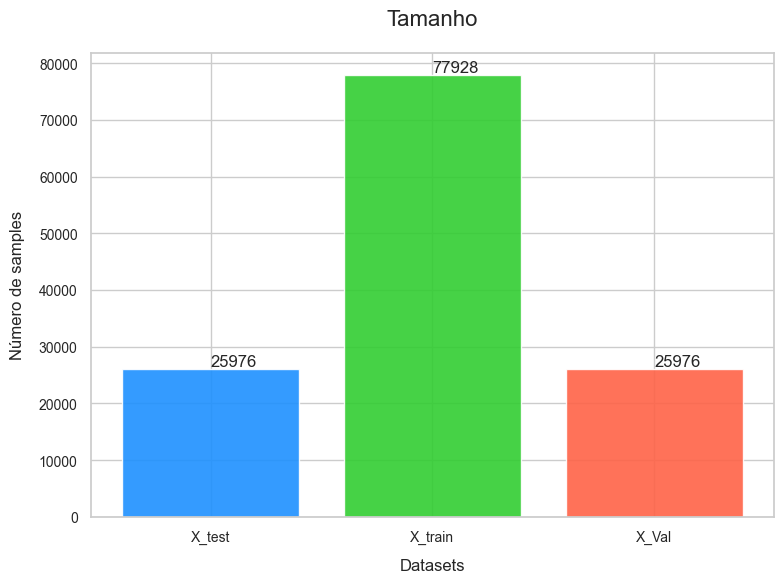

In [35]:
sns.set(style="whitegrid")

# Tamanho de cada conjunto
X_test_samples = X_test.shape[0]
X_train_samples = X_train.shape[0]
X_Val_samples = X_Val.shape[0]

# Setando a posição e valor de cada
sizes = [X_test_samples, X_train_samples, X_Val_samples]
labels = ['X_test', 'X_train', 'X_Val']
colors = ['dodgerblue', 'limegreen', 'tomato']  # Colors for each bar

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=colors, alpha=0.9)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom')

plt.xlabel('Datasets', fontsize=12, labelpad=10)
plt.ylabel('Número de samples', fontsize=12, labelpad=10)
plt.title('Tamanho', fontsize=16, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Importando GradientBoosting
```python
from sklearn.ensemble import GradientBoostingClassifier

In [36]:

from sklearn.ensemble import GradientBoostingClassifier

```python
# Vamos então testar uma instância simples de GradientBoosting e testar sua acurácia
from sklearn.metrics import accuracy_score

In [37]:
Test_Model = GradientBoostingClassifier()
Test_Model.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
def simple_performance(modelo):
    percent = modelo.predict(X_test)
    resultado = accuracy_score(y_test,percent)
    print(resultado)
    total_errors = (y_test != percent).sum()
    print(X_test.shape[0], total_errors)


simple_performance(Test_Model)

0.9409069910686788
25976 1535


Estatística KS: 0.8828351236619308
Valor p: 0.0


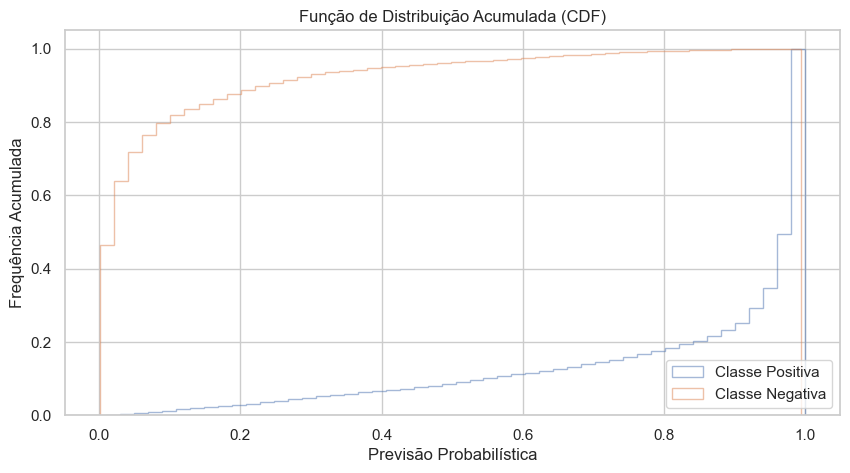

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

def calculate_and_plot_ks_statistic(model, X_test, y_test):
    
    y_probs = model.predict_proba(X_test)[:, 1]  # probabilities of the positive class

    
    # Scores for the positive and negative classes
    pred_pos = y_probs[y_test == 1]
    pred_neg = y_probs[y_test == 0]

    # Calculate the KS statistic
    ks_statistic, p_value = ks_2samp(pred_pos, pred_neg)
    print(f'Estatística KS: {ks_statistic}')
    print(f'Valor p: {p_value}')

    # Plotting the CDFs using histograms
    plt.figure(figsize=(10, 5))
    plt.hist(pred_pos, bins=50, alpha=0.5, label='Classe Positiva', density=True, cumulative=True, histtype='step')
    plt.hist(pred_neg, bins=50, alpha=0.5, label='Classe Negativa', density=True, cumulative=True, histtype='step')
    plt.xlabel('Previsão Probabilística')
    plt.ylabel('Frequência Acumulada')
    plt.title('Função de Distribuição Acumulada (CDF)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return ks_statistic, p_value

ks_statistic, p_value = calculate_and_plot_ks_statistic(Test_Model, X_test, y_test)


AUROC: 0.9875359437609007


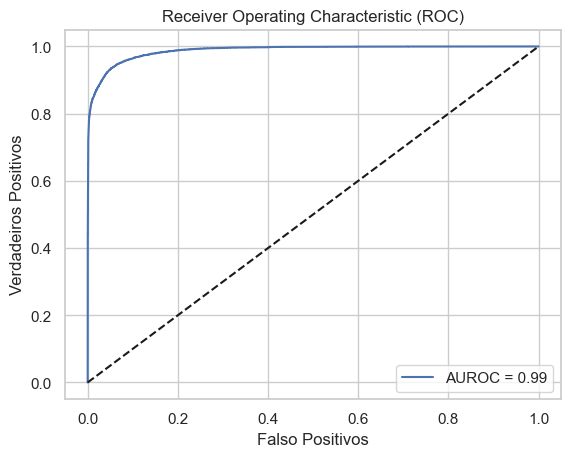

In [47]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(model):

    y_probs = model.predict_proba(X_test)[:, 1]

    auroc = roc_auc_score(y_test, y_probs)
    print(f'AUROC: {auroc}')

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'AUROC = {auroc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('Falso Positivos')
    plt.ylabel('Verdadeiros Positivos')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


auc_value = plot_roc_curve(Test_Model)


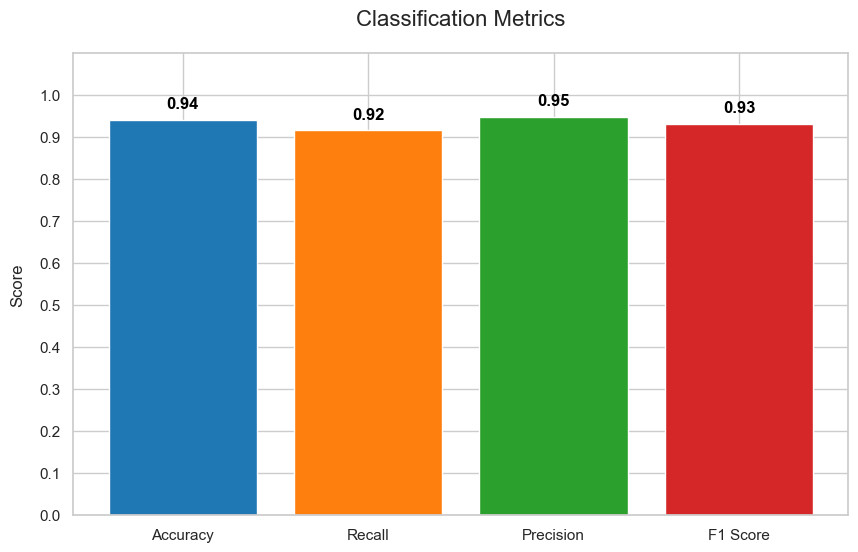

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Setting a style with Seaborn
sns.set(style='whitegrid')

def evaluate_and_plot_metrics(model):
    # Prediction
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Metrics for plotting
    metrics = [accuracy, recall, precision, f1]
    labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # A set of visually appealing colors
    
    # Create a bar plot for the metrics
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, metrics, color=colors, alpha=1)
    
    # Adding text labels on the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', va='bottom', ha='center', color='black', fontweight='bold')
    
    plt.ylabel('Score', labelpad=10, fontsize=12)
    plt.title('Classification Metrics', pad=20, fontsize=16)
    plt.ylim(0, 1.1)  # Extend y-axis to make room for labels
    plt.yticks(np.arange(0, 1.1, step=0.1))  # Adjust y-ticks for clarity
    plt.show()

    return accuracy, recall, precision, f1


accuracy, recall, precision, f1 = evaluate_and_plot_metrics(Test_Model)



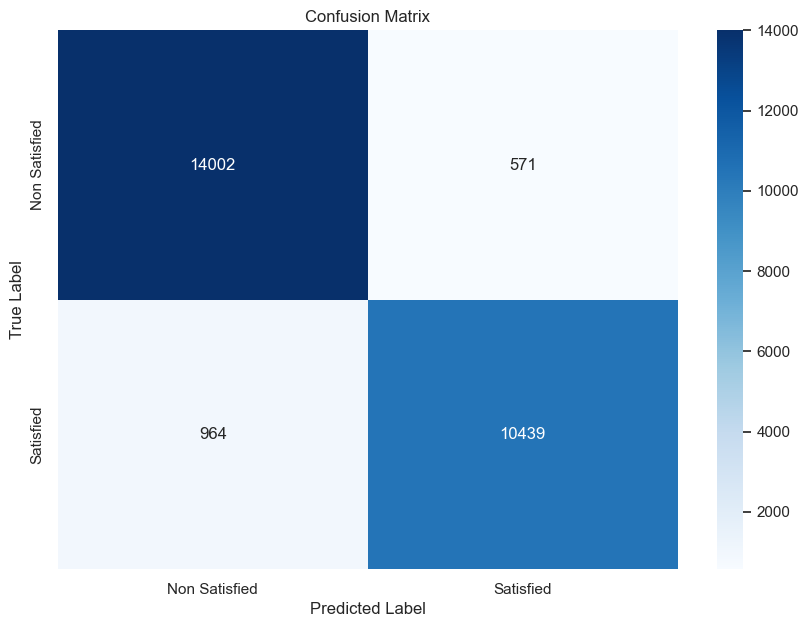

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Satisfied', 'Satisfied'], yticklabels=['Non Satisfied', 'Satisfied'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(Test_Model)

#### Resultados iniciais
```python
# Conseguimos um resultado interessante com uma abordagem direta, vamos realizar um teste arbitrário de hiperparâmetros

In [11]:
Segundo_teste = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)
Segundo_teste.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [12]:
simple_performance(Segundo_teste)

0.8896288882044965
25976 2867


Estatística KS: 0.802638919060228
Valor p: 0.0


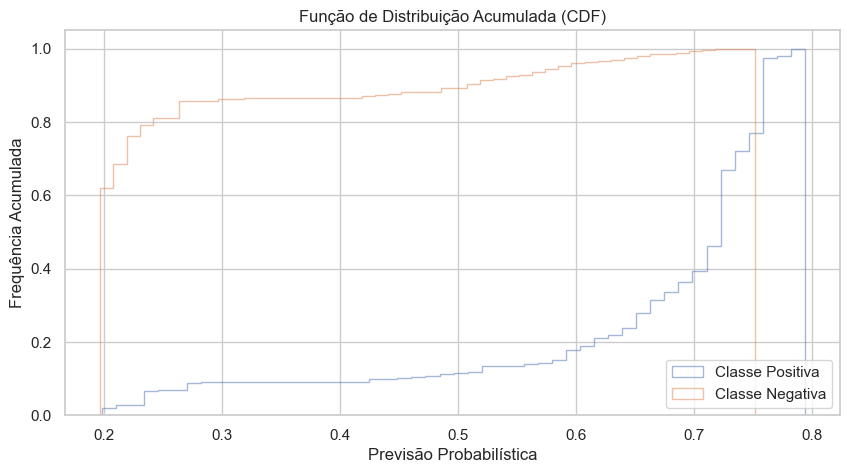

In [56]:
plot_kss = calculate_and_plot_ks_statistic(Segundo_teste, X_test, y_test)

AUROC: 0.9638978527328018


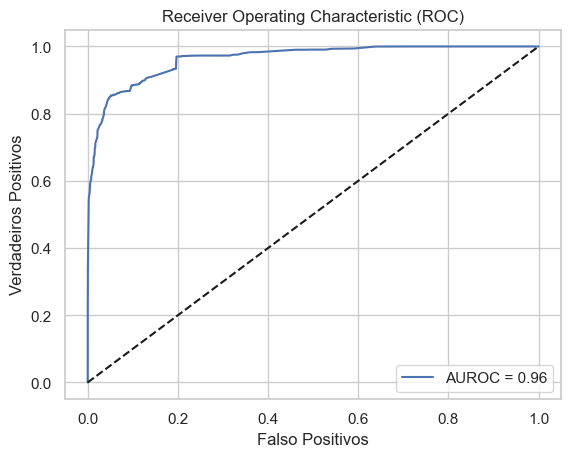

In [57]:
plot_roc_curve(Segundo_teste)

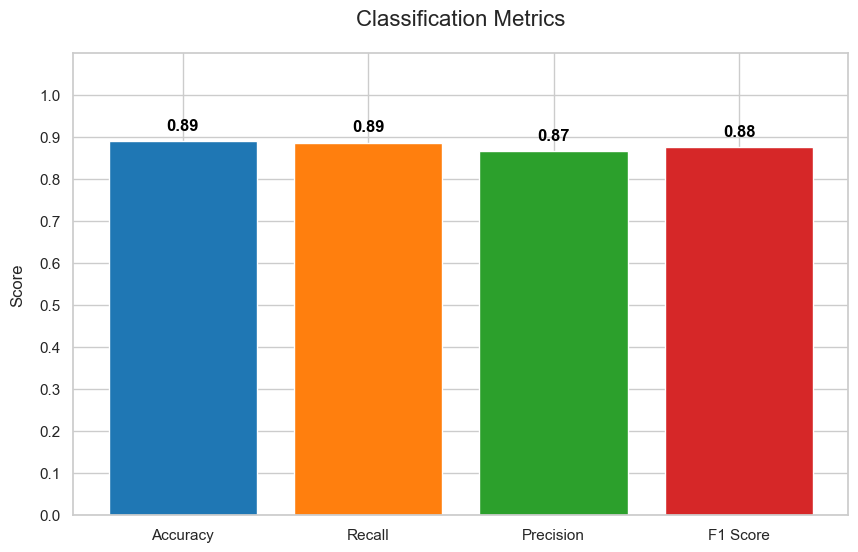

(0.8896288882044965,
 0.8861703060598088,
 0.8655987664896351,
 0.8757637474541752)

In [58]:
evaluate_and_plot_metrics(Segundo_teste)

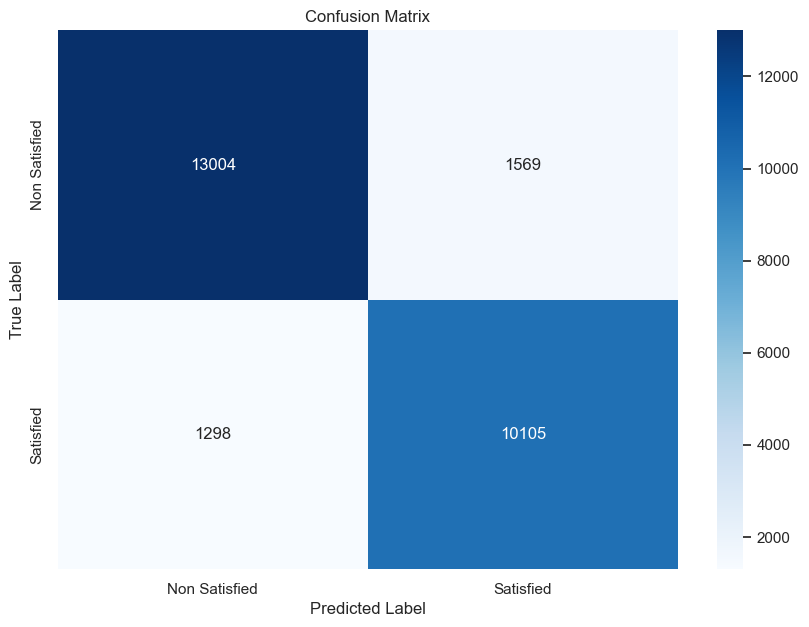

In [59]:
plot_confusion_matrix(Segundo_teste)

#### Resultados
```python
# Regredimos o bom resultado inicial, portanto é fundamental utilizar uma ferramenta para encontrar um resultado interessante para hiperparâmetros
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

# Grid de parâmetros a serem testados
param_grid = {
    'n_estimators': list(range(10,50,10)),  
    'max_depth': [None] + list(range(10,30,10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4]
}

# instanciando o modelo
gb = GradientBoostingClassifier(random_state=42)

# instanciando o GridSearch com o grid de parâmetros e o modelo
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   5.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   5.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   9.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20;

### Melhores parâmetros
```python
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}

In [60]:
teste_gs = GradientBoostingClassifier(max_depth = 10, min_samples_leaf= 1, min_samples_split = 10, n_estimators = 40)
teste_gs.fit(X_train, y_train)
simple_performance(teste_gs)

0.9581536803202957
25976 1087


Estatística KS: 0.9133649864153903
Valor p: 0.0


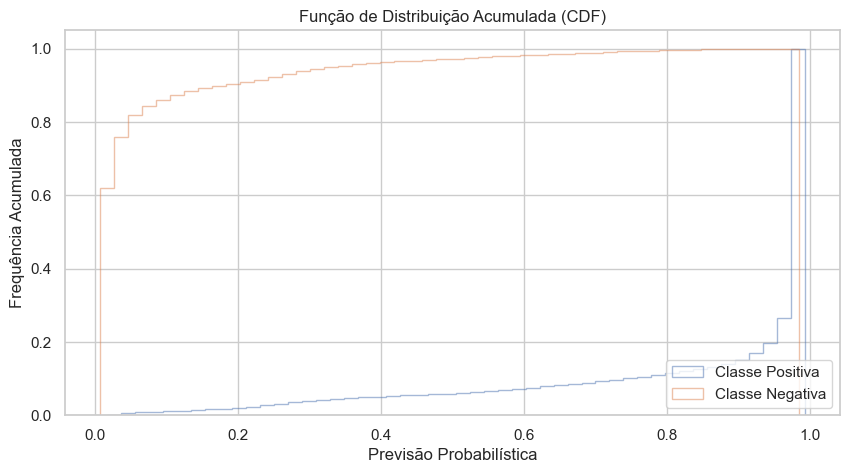

In [61]:
plot_kss = calculate_and_plot_ks_statistic(teste_gs, X_test, y_test)

AUROC: 0.993356161309991


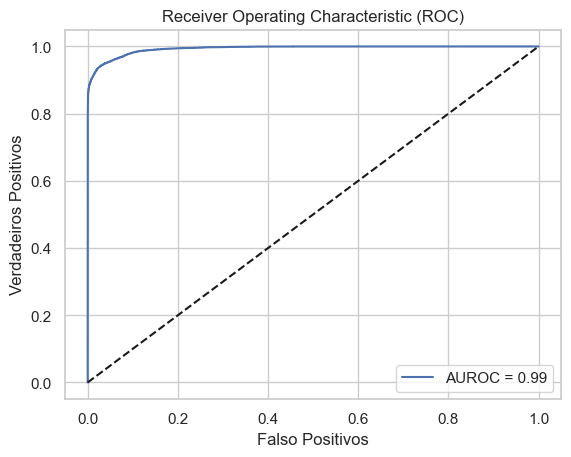

In [62]:
plot_roc_curve(teste_gs)

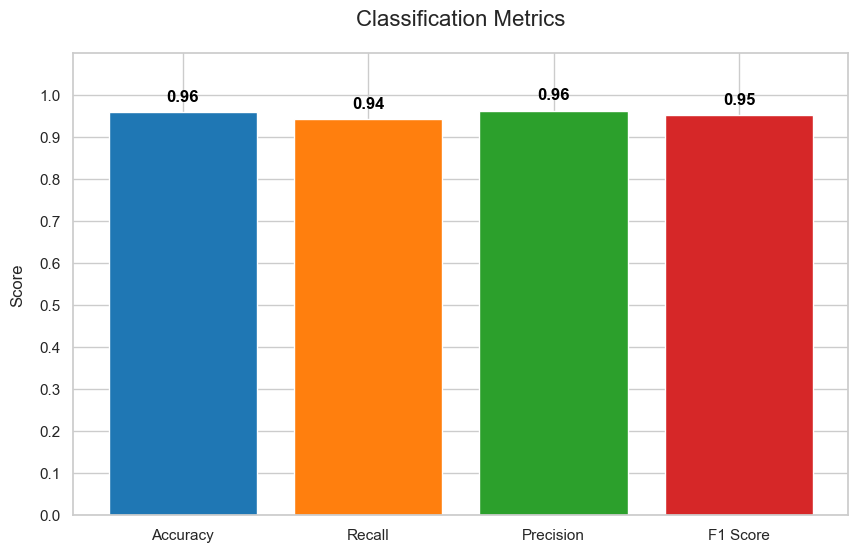

(0.9581536803202957,
 0.9417697097255109,
 0.9621035656692349,
 0.9518280522933747)

In [63]:
evaluate_and_plot_metrics(teste_gs)

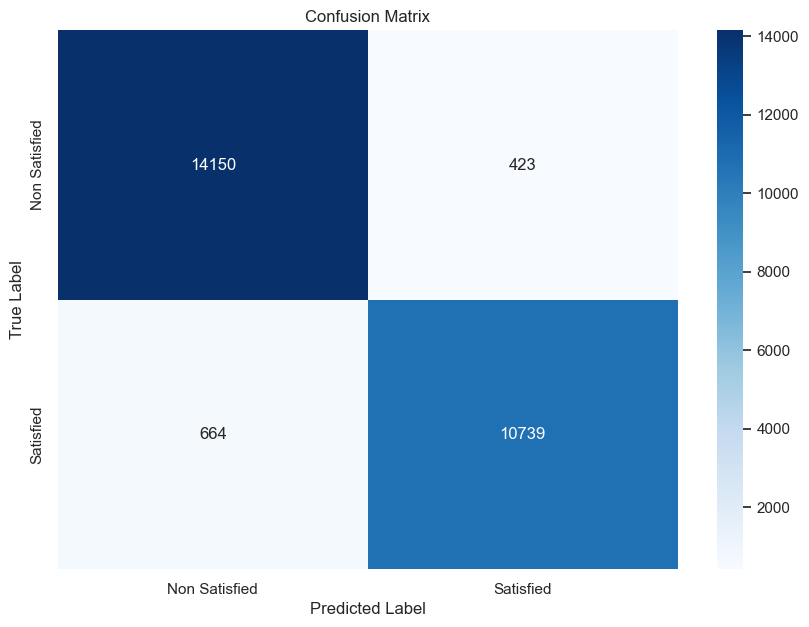

In [64]:
plot_confusion_matrix(teste_gs)